<a href="https://colab.research.google.com/github/madhumakireddy/WebGLSamples.github.io/blob/master/Copy_of_CS666_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

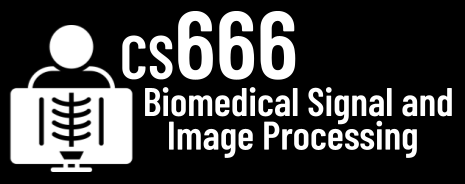
#Assignment 2

In [ ]:
### TODO: makireddy madhu sudhana reddy

In [ ]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [ ]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** Analyze the data. [20 Points]


In [ ]:
# How many EEG channels were used when acquiring the data?
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER

In [ ]:
ch_names = raw.ch_names
print(ch_names)
raw.info



['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

The above output shows 60 EEG channels

In [ ]:
# TODO What is the sampling frequency of this data?
# TODO: YOUR ANSWER
sfreq = raw.info['sfreq']
print(sfreq)

600.614990234375


In [ ]:
#the Sampling frequency is 600.61 Hz

In [ ]:
# TODO What is the total duration of the measurement?
# TODO:the total duration 4 minute 38 seconds
     


In [ ]:
n_samples = raw.n_times
duration = n_samples / sfreq
raw


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>

In [ ]:
#the total duration is 4 minute 38 seconds

**Task 2:** Let's look at some channels! [20 Points]

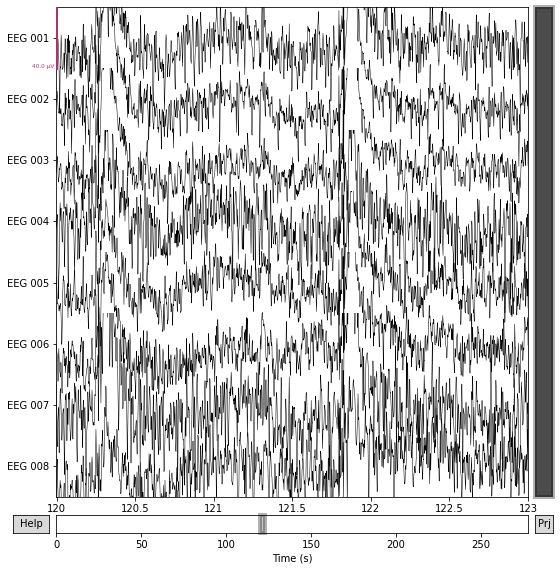

In [ ]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [ ]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.

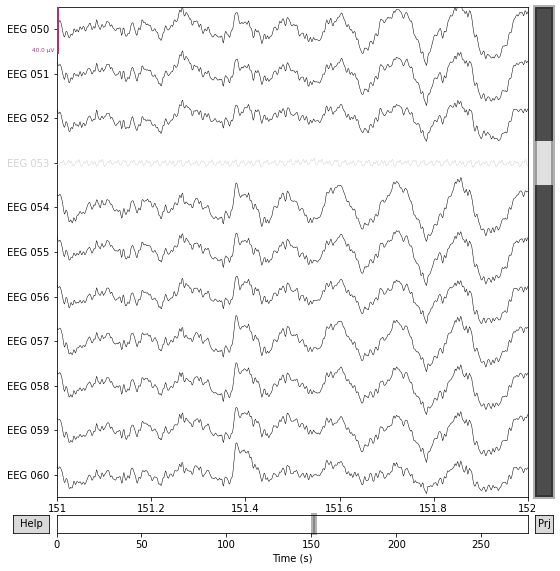

In [ ]:
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg50to60 = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO: Do you see a bad channel? If yes, which one?
# TODO:  yes, it is EEG 053

**Task 3:** How long between event and brain activity? [25 Points]

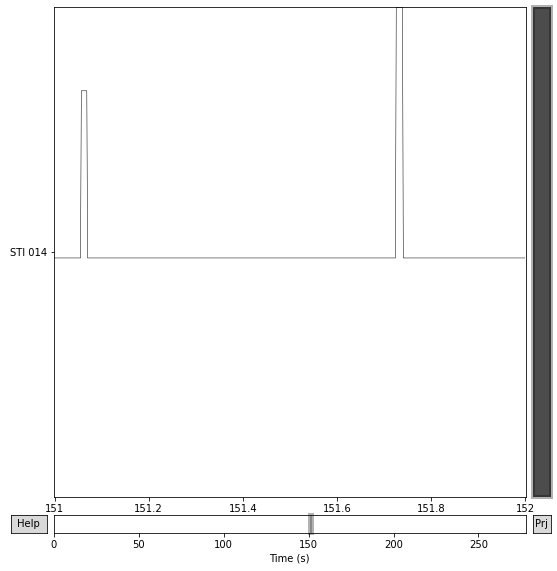

In [ ]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

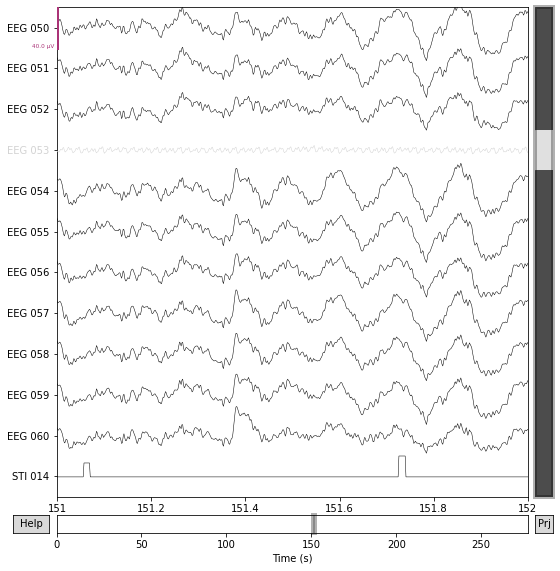

In [ ]:
eeg_chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
eeg_chan_idxs = [raw.ch_names.index(ch) for ch in eeg_chs]
stim_ch = 'STI 014'
stim_chan_idxs = [raw.ch_names.index(stim_ch)]
combined_plot = raw.plot(order=eeg_chan_idxs + stim_chan_idxs, start=151, duration=1)

In [ ]:
# TODO How many stimulus events do you observe?
# TODO: YOUR_ANSWER

In [ ]:
# there are 2 stimulus events


In [ ]:
# TODO Please estimate the time between the first stimulus and brain activity response.
# TODO: Approximatly 0.2 t0 0.3 seconds
     

**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [ ]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


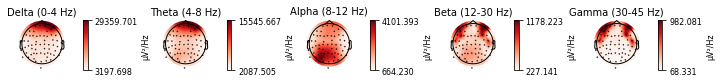

In [ ]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


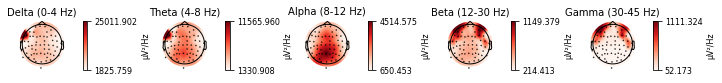

In [ ]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [ ]:
# TODO Please visualize the average brain activity when the subject pushes the button

    Using multitaper spectrum estimation with 7 DPSS windows


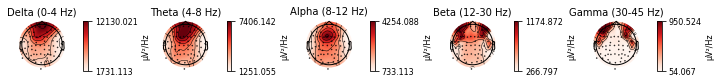

In [ ]:
button_activity = epochs['button'].compute_psd().plot_topomap()


In [ ]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO: YOUR ANSWE

The differences between the visual/right, face, and button stimuli can be seen in the patterns of brain activity they elicit. The visual/right and face stimuli appear to elicit similar patterns of brain activity, primarily in the occipital and temporal regions of the brain, which are involved in processing visual and facial stimuli, respectively. In contrast, the button stimulus elicits brain activity primarily in the central part of the brain, which is involved in motor planning and execution.

In summary, the brain regions that are most active in response to each stimulus can be used to differentiate between the visual/right, face, and button events. The occipital and temporal regions are primarily active in response to the visual/right and face stimuli, while the central part of the brain is primarily active in response to the button stimulus.

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [ ]:
# TODO Please go back to Task 3. Can you figure out which event types happened?

320 events found
Event IDs: [ 1  2  3  4  5 32]


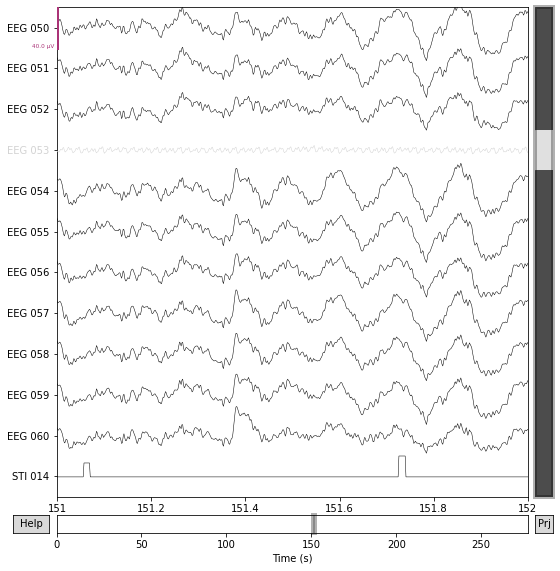

Figure(576x576)


In [ ]:
eeg_chan_idxs = [raw.ch_names.index(ch) for ch in eeg_chs]
stim_ch = 'STI 014'
stimulus = mne.find_events(raw, stim_channel = 'STI 014')
event_graph = raw.plot(order=eeg_chan_idxs + stim_chan_idxs, start=151, duration=1)  
print(event_graph)  

2 events found
Event IDs: [2 3]
[[116527      0      2]
 [116929      0      3]]
Not setting metadata
2 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated


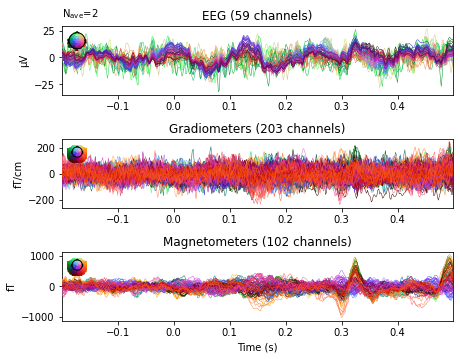

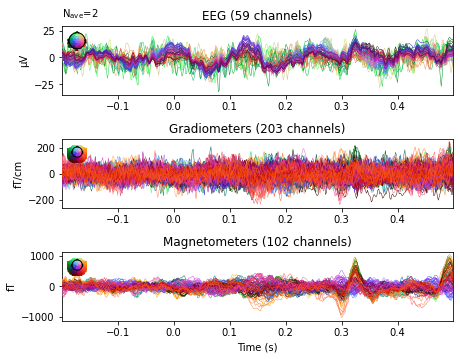

In [ ]:
raw_crop = raw.copy().crop(151, 152)
events = mne.find_events(raw_crop, stim_channel='STI 014')
print(events)

Epochs=mne.Epochs(raw,events=events)
out=Epochs.average()
out.plot()


The EEG signal can change in response to different stimuli, indicating a change in neural activity. The specific changes observed in the EEG signal depend on the type of stimulus and the neural processes involved in processing it.

For example, a visual stimulus may cause changes in the amplitude and frequency of the EEG signal in the occipital lobe, which is responsible for processing visual information. An auditory stimulus may cause changes in the amplitude and frequency of the EEG signal in the temporal lobe, which is responsible for processing auditory information. And a somatosensory stimulus may cause changes in the amplitude and frequency of the EEG signal in the somatosensory cortex, which is responsible for processing touch and other bodily sensations.

In the case of the "button" event type of stimulus, changes in the EEG signal can be expected to occur in brain regions involved in motor planning and execution, as hitting a button requires the planning and execution of a motor movement.

In [ ]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#